In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from scipy.optimize import approx_fprime
import pandas as pd
import math

In [2]:
diabetes = datasets.load_diabetes()
y = diabetes.target
X = diabetes.data
df = pd.DataFrame(X[:,0:7], columns = ['T1','T2','T3','T4','T5','T6','T7'])
df["target"] = y
df.head()
df



,T1,T2,T3,T4,T5,T6,T7,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,135.0
...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,220.0


In [3]:

T=(len(X[0])+1) * [1]  # initialize T vector of parameters wit 1 value
#linear function f(x) = T0 + T1X1 +T2X2+ ...
# Mean Squared Error function
def cost_function(X, y, T):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (T[0] + sum([T[j+1]*X[i][j] for j in range(len(X[i]))])-y[i]  ) ** 2
    return total_cost / (2 * len(X))

In [4]:

def der_theta0(X, y, T):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (T[0] + sum([T[j+1]*X[i][j] for j in range(len(X[i]))])-y[i] )
    return total_cost / (len(X)) 

In [5]:

def der_thetaN(X, y, T, idx):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (T[0] + sum([T[j+1]*X[i][j] for j in range(len(X[i]))])-y[i] ) *X[i][idx]
    return total_cost / (len(X)) 

In [6]:
def gradient(X, y, T):
    grad = []
    grad.append(der_theta0(X, y, T))
    for j in range(1, len(T)):
        grad.append(der_thetaN(X, y, T, j-1))
    return np.asarray(grad)

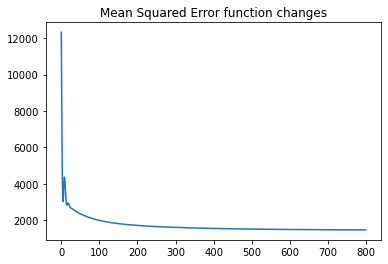

1459.2819580805199


In [36]:
# Nesterov Momentum

T=(len(X[0])+1) * [0.1]  # initialize T vector of parameters wit 1 value
EPOCHS = 800
momentum = 0.9
step_size = 0.1
change = [0 for _ in range(len(T))]
sol_eval =[]
for it in range(EPOCHS):
    prT  = [T[i] - momentum*change[i] for i in range(len(T))]
    grT = gradient(X, y, prT)
    for i in range(len(T)):
        change[i]=momentum*change[i] + step_size*grT[i]
        T[i] = T[i]-change[i]
    sol_eval.append(cost_function(X, y, T))
plt.title('Mean Squared Error function changes')    
plt.plot(sol_eval)
plt.show()
print(sol_eval[-1])    
# С чем может быть связанно плато в графике изменения Mean Squared Error
# Локальный минимум, не верная реализация алгоритма, надо играться с параметрами?


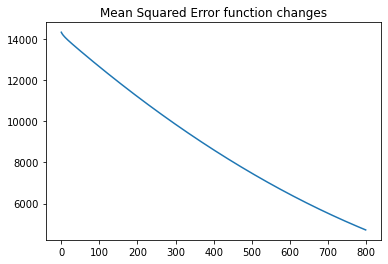

In [37]:
# RMSprop
T=(len(X[0])+1) * [1]  # initialize T vector of parameters wit 1 value
EPOCHS = 800
momentum = 0.9
step_size = 0.1
e = 10**(-8)
change = [0 for _ in range(len(T))]
sol_eval =[]
for it in range(EPOCHS):
    grT = gradient(X, y, T)
    grT2 = [x**2 for x in grT]
    for i in range(len(T)):
        change[i]=momentum*change[i] + (1-momentum)*grT2[i]
        T[i] = T[i]-step_size* (grT[i]/(math.sqrt(change[i])+e))  
    sol_eval.append(cost_function(X, y, T))
   
plt.title('Mean Squared Error function changes')
plt.plot(sol_eval)
plt.show()
